# Assignment

## Review

参考 jupyter notebook `Lecture-02-Review.ipynb` 

## Theory

### Q&A

#### What conditions are required to make the BFS return the optimal solution ?

1. 节点间的权重为非负值
2. 历史搜索结果按权重排序

#### Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

TODO

#### In what conditions BFS is a better choice than DFS and vice versa ?

TODO

#### When can we use machine learning ?

从历史经验数据中学习一个模型或函数，提高未来数据的预测能力。

#### What is the gradient of a function ?

梯度是偏导数组成的向量，是函数变化最快的方向。

#### How can we find the maximum value of a function using the information of gradient ?

沿着梯度的方向，以一定的步长增加自变量$x$，直到函数值$y$的变化值很小。

## Practice

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in.

[北京地铁线路图](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571921655377&di=13778a50ffd80fedf49506fd5c58c5d4&imgtype=0&src=http%3A%2F%2Fwww.fxhotels.com%2Ftw%2Fimage%2Fcityguide%2Fbeijing%2Fsubwaymap1.jpg)

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571921655377&di=13778a50ffd80fedf49506fd5c58c5d4&imgtype=0&src=http%3A%2F%2Fwww.fxhotels.com%2Ftw%2Fimage%2Fcityguide%2Fbeijing%2Fsubwaymap1.jpg)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

### Get Data from Web

References:

1. [高德地图北京地铁数据](http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json)
2. [高德地图北京地铁响应报文字段解释](https://blog.csdn.net/gisshixisheng/article/details/44976241)

In [133]:
import json
import requests

def crawl_bj_subway_data():
    """
    download beijing subway data from web
    """
    URL = 'http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json'
    resp = requests.get(URL)
    assert resp.status_code == 200

    resp_data = json.loads(resp.content)

    subway_lines = []

    # parse response
    for line in resp_data['l']:
        subway_line = {}

        subway_line['line_code'] = line['ls']  # 线路编码
        subway_line['line_name'] = line['ln']  # 线路名称
        subway_line['is_loop'] = line['lo']  # 是否环线
        subway_line['aviable'] = line['su']  # 可用状态
        subway_line['stations'] = []

        for station in line['st']:
            geo = list(map(lambda x: float(x),  station['sl'].split(',')))
            subway_line['stations'].append({
                'name': station['n'],  # 站点名称
                'poiid': station['poiid'],  # 站点编码
                'geo': geo,  # 经纬度 "116.422119,39.857521"  "经度，维度"
                'transfer': station['t'],    # 换乘 '0' - 可换乘， ‘1’ - 不可换乘
                'aviable': station['su'],  # 可用状态，‘1’ - 可用, '3' - 正在建设
                'roue': station['r'].split('|'),    # 经过的路线， "900000069871|110100023339" or "110100023339" 线路编码,                
            })

        subway_lines.append(subway_line)


    return subway_lines

In [134]:
# crawl_bj_subway_data()

In [135]:
BJ_SUBWAY_DATA_FILEPATH = './bj_subway.json'

In [251]:
import json

def save_bj_subway_data():
    """
    save bj subway data to file
    """
    bj_subway_lines = crawl_bj_subway_data()

    with open(BJ_SUBWAY_DATA_FILEPATH, 'w+') as f:
        f.write(json.dumps(bj_subway_lines, ensure_ascii=False))
    

In [252]:
save_bj_subway_data()

%ls $BJ_SUBWAY_DATA_FILEPATH

./bj_subway.json


In [253]:
# View parsed subway data

%cat $BJ_SUBWAY_DATA_FILEPATH | jq .

[
  {
    "line_code": "900000069871",
    "line_name": "S1线",
    "is_loop": "0",
    "aviable": "1",
    "stations": [
      {
        "name": "金安桥",
        "poiid": "BV10813545",
        "geo": [
          116.163167,
          39.92362
        ],
        "transfer": "1",
        "aviable": "1",
        "roue": [
          "900000069871",
          "110100023339"
        ]
      },
      {
        "name": "四道桥",
        "poiid": "BV10813547",
        "geo": [
          116.13401,
          39.91603
        ],
        "transfer": "0",
        "aviable": "1",
        "roue": [
          "900000069871"
        ]
      },
      {
        "name": "桥户营",
        "poiid": "BV10813541",
        "geo": [
          116.125809,
          39.912383
        ],
        "transfer": "0",
        "aviable": "1",
        "roue": [
          "900000069871"
        ]
      },
      {
        "name": "上岸",
        "poiid": "BV10813543",
        "geo": [
          116.122225,
          39.905138
       

        "geo": [
          116.505403,
          39.802971
        ],
        "transfer": "0",
        "aviable": "1",
        "roue": [
          "110100023102"
        ]
      },
      {
        "name": "荣京东街",
        "poiid": "BV10003511",
        "geo": [
          116.513321,
          39.793189
        ],
        "transfer": "0",
        "aviable": "1",
        "roue": [
          "110100023102"
        ]
      },
      {
        "name": "荣昌东街",
        "poiid": "BV10013450",
        "geo": [
          116.521688,
          39.782832
        ],
        "transfer": "0",
        "aviable": "1",
        "roue": [
          "110100023102"
        ]
      },
      {
        "name": "同济南路",
        "poiid": "BV10007921",
        "geo": [
          116.539901,
          39.772962
        ],
        "transfer": "0",
        "aviable": "1",
        "roue": [
          "110100023102"
        ]
      },
      {
        "name": "经海路",
        "poiid": "BV10013449",
        "geo": [
        

### Processing Data

Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [254]:

def load_data(filepath):
    """
    load subway data
    """
    with open(filepath) as f:
        subway_data = f.read()

    subway_data = json.loads(subway_data)

    return subway_data

In [257]:
bj_subway_data = load_data(BJ_SUBWAY_DATA_FILEPATH)

In [162]:
# import pandas as pd


# bj_subway_data = load_data(BJ_SUBWAY_DATA_FILEPATH)

# def parse_subway_data():
#     """
#     parse subway data
#     """
#     subway_stations = []

#     for line in bj_subway_data:
#         station_index = 0
#         for st in line['stations']:
#             st_tuple = [station_index, st['name'], st['poiid'], st['geo'], st['transfer'], 
#                         st['aviable'], st['roue'], line['line_name'], line['line_code'], 
#                         line['is_loop'], line['aviable']]
#             subway_stations.append(st_tuple)

#             station_index += 1


#     station_df = pd.DataFrame(subway_stations, 
#                               columns=['st_index', 'st_name', 'st_poiid', 'st_geo', 'st_transfer', 
#                                        'st_aviable', 'route', 'line_name', 'line_code', 
#                                        'line_loop', 'line_aviable'])

#     return station_df

In [161]:
# st_df = parse_subway_data()
# st_df.head()

In [ ]:
# %matplotlib inline

# import networkx as nx

# bj_subway_graph = nx.Graph()

# # station nodes
# for index, name, geo, transfer, aviable, loop in \
#     st_df[['st_index', 'st_name', 'st_geo', 'st_transfer', 'st_aviable', 'line_loop']].values:
#     bj_subway_graph.add_node(name, geo=geo,
#                          transfer=transfer, aviable=aviable, loop=loop)


# # station edges
# for index, name, geo, transfer, loop in \
#     st_df[['st_index', 'st_name', 'st_geo', 'st_transfer', 'line_loop']].values:
#     if index != 0:
#         distance = geo_distance(bj_subway_graph.nodes[last]['geo'], bj_subway_graph.nodes[name]['geo'])
#         bj_subway_graph.add_edge(last, name, distance=distance)
#         bj_subway_graph.add_edge(name, last, distance=distance)
#     else:
#         # begin node
#         begin = name

#     last = name


In [191]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

subway data schema: 
    
```json
[
  {
    "line_code": "900000069871",
    "line_name": "S1线",
    "is_loop": "0",
    "aviable": "1",
    "stations": [
      {
        "name": "金安桥",
        "poiid": "BV10813545",
        "geo": [
          116.163167,
          39.92362
        ],
        "transfer": "1",
        "aviable": "1",
        "roue": [
          "900000069871",
          "110100023339"
        ]
      }]
  }
]        
```

In [200]:
def parse_subway_location(subway_data:dict):
    """
    parse subway location.
    """
    station_location = {}

    for line in subway_data:
        for station in line['stations']:
            station_location[station['name']] = station['geo']

    return station_location

In [203]:
# parse_subway_location(bj_subway_data)

In [322]:
import networkx as nx

def build_subway_graph(subway_data:dict, line_name=None):
    """
    Build subway graph.
    """
    subway_graph = nx.Graph()

    # add station nodes and edges
    for line in subway_data:
        for station in line['stations']:
            subway_graph.add_node(station['name'], **station)

    for line in subway_data:
        for i, station in enumerate(line['stations']):
            if i == 0: continue

            last = line['stations'][i-1]
            distance = geo_distance(last['geo'], station['geo'])
            subway_graph.add_edge(last['name'], station['name'], distance=distance)

        # process loop line
        if line['is_loop'] == '1':
            begin = line['stations'][0]
            end = line['stations'][-1]
            distance = geo_distance(begin['geo'], end['geo'])
            subway_graph.add_edge(begin['name'], end['name'], distance=distance)

    return subway_graph


In [314]:
import networkx as nx
import matplotlib.pyplot as plt


def show_subway_graph(graph, location, figsize=(18, 14)):
    """
    draw subway graph.
    """
    plt.figure(figsize=figsize)
    nx.draw(graph, location, with_labels=True, node_size=20)

In [319]:
subway_graph = build_subway_graph(bj_subway_data)
subway_location = parse_subway_location(bj_subway_data)

In [325]:
subway_graph.nodes['金安桥']

{'name': '金安桥',
 'poiid': 'BV10813545',
 'geo': [116.163167, 39.92362],
 'transfer': '1',
 'aviable': '1',
 'roue': ['900000069871', '110100023339']}

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


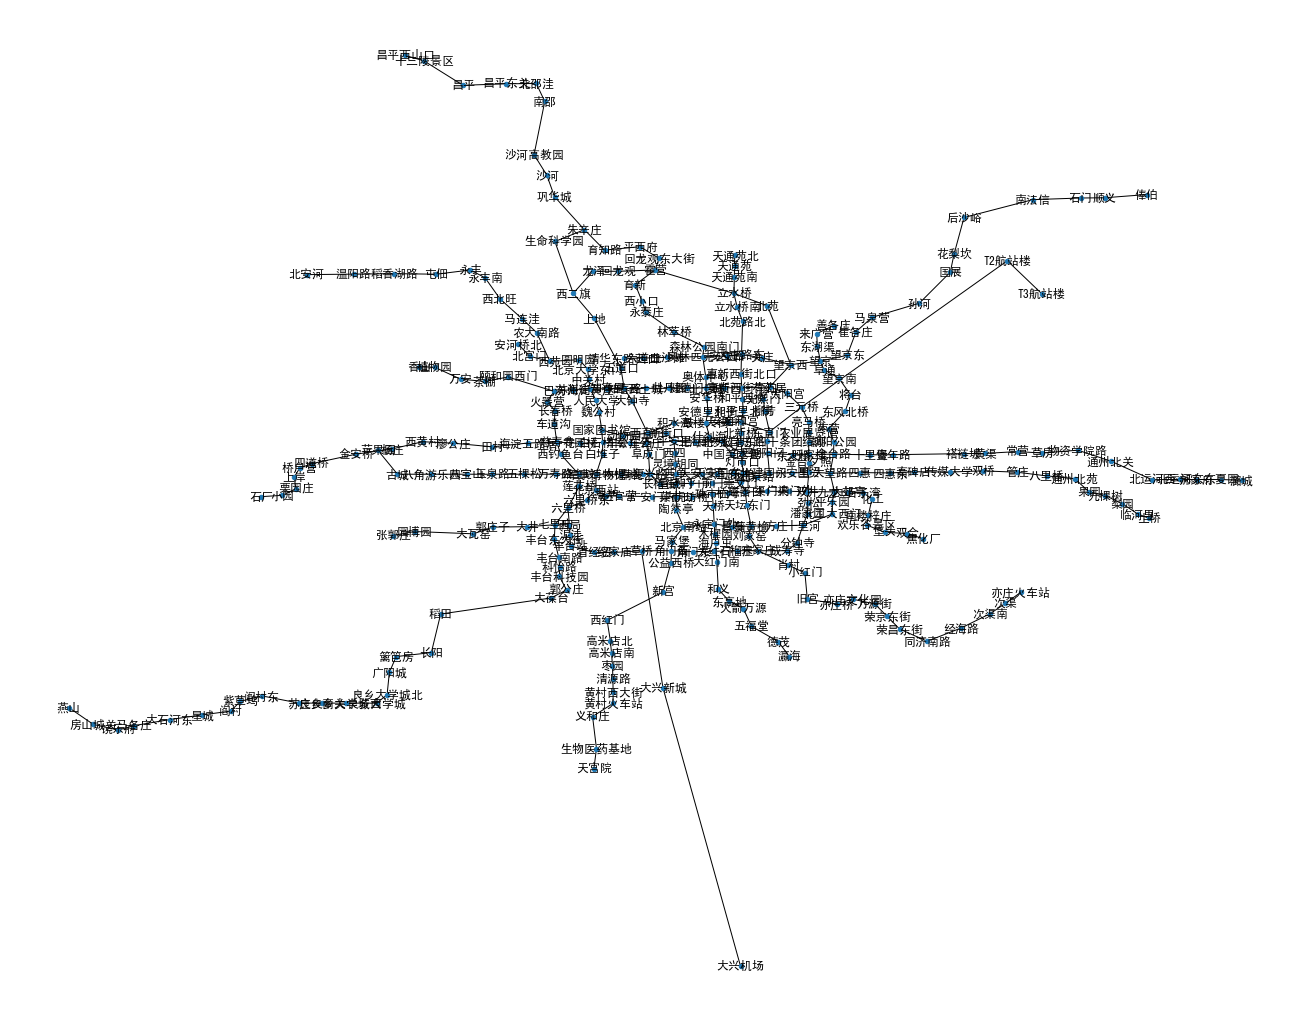

In [324]:
# show Beijing subway graph.
show_subway_graph(subway_graph, subway_location)


### Build the search agent

Build the search agent based on the graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [348]:
def search(graph:nx.Graph, start:str, dest:str):
    """
    Search based on Breadth First.
    """

    # check whether the station existed?
    assert start in graph, '{} not found in graph, please check station name first!'.format(start)
    assert dest in graph, '{} not found in graph, please check station name first!'.format(dest)

    pathes = [[start]]
    visited = set()

    while pathes:
        path = pathes.pop(0)

        frointer = path[-1]
        if frointer in visited: continue

        for successor in graph[frointer]:
            if successor in path: continue  # check loop

            if successor == dest:
                return path + [successor]

            new_path = path + [successor]  # enqueue
            pathes.append(new_path)

        visited.add(frointer)

    return None

In [273]:
subway_data = load_data(BJ_SUBWAY_DATA_FILEPATH)
subway_graph = build_subway_graph(subway_data)

In [345]:
'->'.join(search(subway_graph, '西二旗', '北京西站'))

'西二旗->上地->五道口->知春路->大钟寺->西直门->车公庄->车公庄西->白石桥南->白堆子->军事博物馆->北京西站'

In [346]:
'->'.join(search(subway_graph, '奥体中心', '天安门西'))

'奥体中心->北土城->安华桥->安德里北街->鼓楼大街->积水潭->西直门->车公庄->阜成门->复兴门->西单->天安门西'

### (Optional) Improve your agent to make it able to find a path based on different strategies

a. Find the shortest path between two stations.

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

d. Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

In [342]:
def search_with_strategy(graph, start, dest, search_strategy=lambda x: x):
    """
    Search with strategy.
    """
    # check whether the station existed?
    assert start in graph, '{} not found in graph, please check station name first!'.format(start)
    assert dest in graph, '{} not found in graph, please check station name first!'.format(dest)

    pathes = [[start]]
    visited = set()

    while pathes:
        path = pathes.pop(0)

        frointer = path[-1]
        if frointer in visited: continue

        for successor in graph[frointer]:
            if successor in path: continue  # check loop

            if successor == dest:
                return path + [successor]

            new_path = path + [successor]  # enqueue
            pathes.append(new_path)

        visited.add(frointer)

        # apply search strategy
        pathes = search_strategy(pathes)
        

    print('Do not find the path between {} and {}'.format(start, dest))
    return None

#### Shortest path search

In [343]:
# TODO

#### Minimum transfer search

In [347]:
# TODO

#### Search based path and transfer

In [ ]:
# TODO

#### Compare results with Baidu Map search results

In [332]:
# TODO